In [ ]:
import lmfit as lm
import numpy as np
import xarray as xr


Say we want to calculate the kinetic energy and we have measurements:

m = 5(1) kg

v = 10(2) m/s

In [9]:
def kinetic_energy_j(m_kg, v_mps):
    return 0.5 * m_kg * v_mps**2

In [10]:
ds = xr.Dataset()
ds["v_mps"] = 5
ds.v_mps.attrs = {"long_name": "Velocity", "units": "m/s"}
ds["m_kg"] = 10
ds.m_kg.attrs = {"long_name": "Mass", "units": "kg"}
ds["Ekin_j"] = xr.apply_ufunc(kinetic_energy_j, ds.m_kg, ds.v_mps)
ds.Ekin_j.attrs = {"long_name": "Energy", "units": "J"}
ds

<xarray.Dataset> Size: 24B
Dimensions:  ()
Data variables:
    v_mps    int64 8B 5
    m_kg     int64 8B 10
    Ekin_j   float64 8B 125.0

In [11]:
mc_size = 10000
ds = xr.Dataset()
ds["v_mps"] = xr.DataArray(np.random.normal(5, 1, mc_size), dims='mc')
ds.v_mps.attrs = {"long_name": "Velocity", "units": "m/s"}
ds["m_kg"] = xr.DataArray(np.random.normal(10, 2, mc_size), dims='mc')
ds.m_kg.attrs = {"long_name": "Mass", "units": "kg"}
ds["Ekin_j"] = xr.apply_ufunc(kinetic_energy_j, ds.m_kg, ds.v_mps)
ds.Ekin_j.attrs = {"long_name": "Energy", "units": "J"}
ds

<xarray.Dataset> Size: 240kB
Dimensions:  (mc: 10000)
Dimensions without coordinates: mc
Data variables:
    v_mps    (mc) float64 80kB 3.746 4.361 5.594 5.025 ... 4.505 5.84 3.92 5.164
    m_kg     (mc) float64 80kB 10.96 7.469 11.86 7.903 ... 9.484 9.888 11.54
    Ekin_j   (mc) float64 80kB 76.87 71.01 185.5 99.77 ... 161.8 75.99 153.8

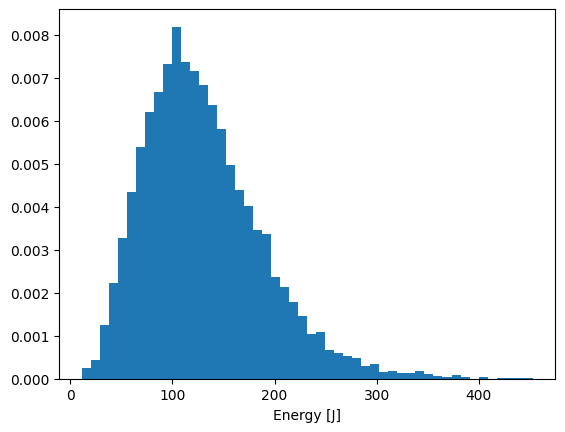

In [12]:
ds.Ekin_j.plot.hist(bins=50, density=True);

In [13]:
mean = ds.Ekin_j.mean('mc')
std = ds.Ekin_j.std('mc')
print(f"E_kin = {mean:.1f} +- {std:.1f} J")

E_kin = 130.2 +- 58.3 J


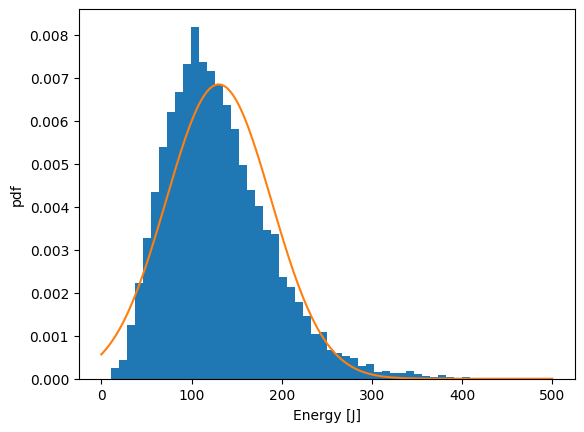

In [57]:
ds_fit = xr.Dataset()
ds_fit['Ekin'] = np.linspace(0, 500, 200)
ds_fit.Ekin.attrs = {"long_name": "Energy", "units": "J"}

ds_fit['pdf'] = xr.DataArray(lm.models.GaussianModel().eval(x=ds_fit.Ekin, center = mean, sigma = std), dims='Ekin')

ds.Ekin_j.plot.hist(bins=50, density=True);
ds_fit.pdf.plot()